## Improved Used Car Price Prediction Model

Paul A. Beata - February 16, 2021

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Load the Data

In [3]:
raw_data = pd.read_csv('../data/car_sales.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
# check for missing values
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
# since there are just a few missing values for PRICE and ENGINEV, we can remove those observations altogether
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Handling Outliers

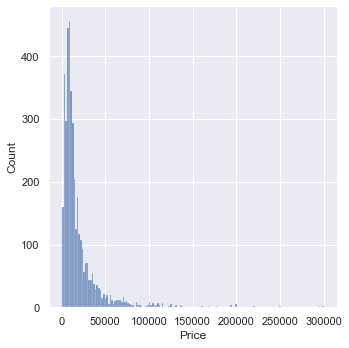

In [8]:
sns.displot(data_no_mv['Price'])

In [76]:
# quantiles
q = data_no_mv['Price'].quantile(0.97)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3904,3904.000000,3904,3904.000000,3904.000000,3904,3904,3904.000000,3904
unique,7,NaN,6,NaN,NaN,4,2,NaN,297
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1509,NaN,NaN,1790,3533,NaN,188
mean,NaN,16082.648299,NaN,168.296363,2.730789,NaN,NaN,2006.108607,NaN
std,NaN,14520.658287,NaN,101.330483,5.004271,NaN,NaN,6.611815,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6900.000000,NaN,97.750000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11000.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20300.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000,NaN


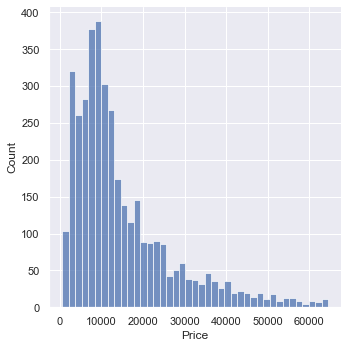

In [12]:
sns.displot(data_1['Price'])

In [77]:
# quantiles
q1 = data_no_mv['Price'].quantile(0.01)
q2 = data_no_mv['Price'].quantile(0.97)

data_2 = data_no_mv[ (data_no_mv['Price'] > q1) & (data_no_mv['Price'] < q2) ]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3862,3862.000000,3862,3862.000000,3862.000000,3862,3862,3862.000000,3862
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,864,NaN,1491,NaN,NaN,1776,3514,NaN,184
mean,NaN,16243.011810,NaN,167.852926,2.740238,NaN,NaN,2006.265924,NaN
std,NaN,14517.282655,NaN,101.294599,5.030438,NaN,NaN,6.444590,NaN
min,NaN,1650.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.250000,NaN,97.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11299.500000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


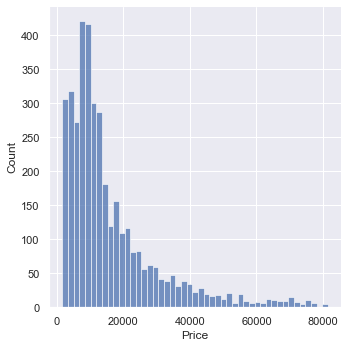

In [79]:
sns.displot(data_2['Price'])

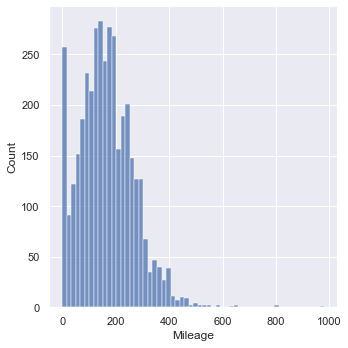

In [80]:
sns.displot(data_2['Mileage'])

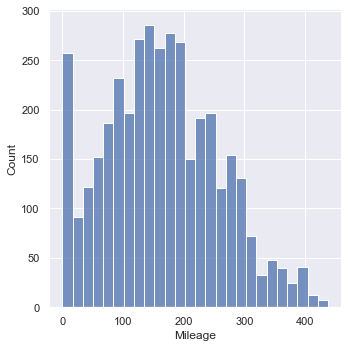

In [81]:
qm = data_2['Mileage'].quantile(0.99)
# data_3 = data_2[ (data_2['Mileage'] < qm) & (data_2['Mileage'] > 0) ]
data_3 = data_2[ (data_2['Mileage'] < qm) ]
sns.displot(data_3['Mileage'])

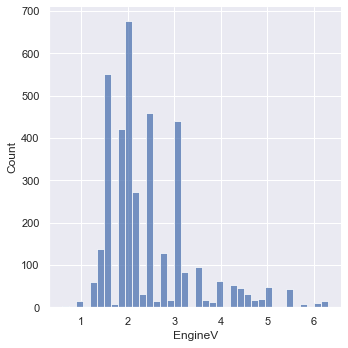

In [82]:
data_4 = data_3[ data_3['EngineV'] < 6.5]
sns.displot(data_4['EngineV'])

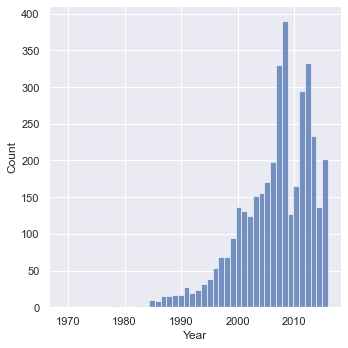

In [83]:
sns.displot(data_4['Year'])

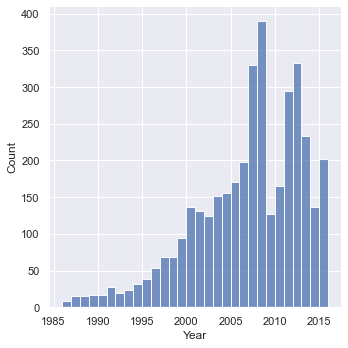

In [84]:
data_5 = data_4[ data_4['Year'] > 1985 ]
sns.displot(data_5['Year'])

In [85]:
data_5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3780,3780.000000,3780,3780.000000,3780.000000,3780,3780,3780.000000,3780
unique,7,NaN,6,NaN,NaN,4,2,NaN,286
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,842,NaN,1450,NaN,NaN,1736,3441,NaN,178
mean,NaN,16431.129130,NaN,163.747354,2.431553,NaN,NaN,2006.505820,NaN
std,NaN,14540.013417,NaN,94.285118,0.941948,NaN,NaN,6.128786,NaN
min,NaN,1650.000000,NaN,0.000000,0.600000,NaN,NaN,1986.000000,NaN
25%,NaN,7150.000000,NaN,96.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20733.437500,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [86]:
# drop the registration column and reset the index
data_clean = data_5.drop(['Registration'], axis=1)
data_clean = data_clean.reset_index(drop=True)
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4
...,...,...,...,...,...,...,...,...
3775,Renault,6800.0,sedan,152,1.6,Petrol,2007,Megane
3776,Volkswagen,11500.0,van,163,2.5,Diesel,2008,T5 (Transporter)
3777,Toyota,17900.0,sedan,35,1.6,Petrol,2014,Corolla
3778,BMW,6500.0,sedan,1,3.5,Petrol,1999,535


In [87]:
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3780,3780.000000,3780,3780.000000,3780.000000,3780,3780.000000,3780
unique,7,NaN,6,NaN,NaN,4,NaN,286
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,842,NaN,1450,NaN,NaN,1736,NaN,178
mean,NaN,16431.129130,NaN,163.747354,2.431553,NaN,2006.505820,NaN
std,NaN,14540.013417,NaN,94.285118,0.941948,NaN,6.128786,NaN
min,NaN,1650.000000,NaN,0.000000,0.600000,NaN,1986.000000,NaN
25%,NaN,7150.000000,NaN,96.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,20733.437500,NaN,230.000000,3.000000,NaN,2011.000000,NaN


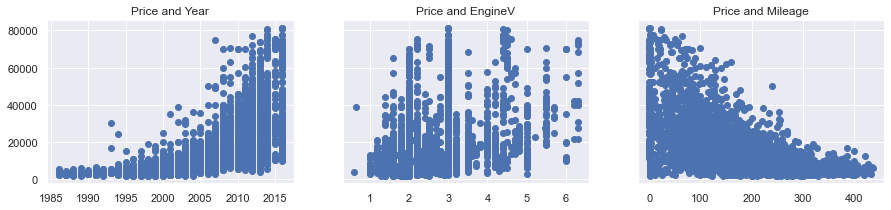

In [88]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_clean['Year'], data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['Price'])
ax3.set_title('Price and Mileage')


plt.show()

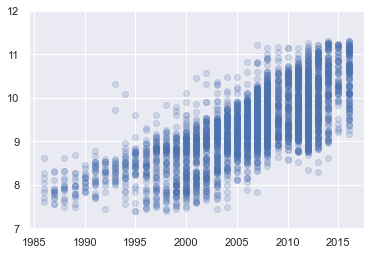

In [89]:
log_price = np.log(data_clean['Price'])
# log_year = np.log(data_clean['Year'])
year = data_clean['Year']

plt.figure()
plt.scatter(year, log_price, alpha=0.2)
# plt.xlim([7.4, 7.8])
plt.ylim([7,12])
plt.show()

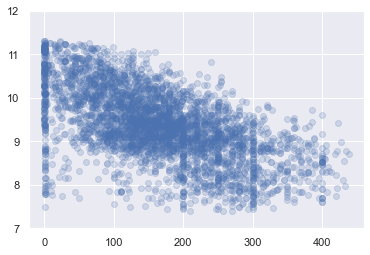

In [90]:
# log_miles = np.log(data_clean['Mileage'])
miles = data_clean['Mileage']

plt.figure()
plt.scatter(miles, log_price, alpha=0.2)
# plt.xlim([7.4, 7.8])
plt.ylim([7,12])
plt.show()

In [91]:
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3780,3780.000000,3780,3780.000000,3780.000000,3780,3780.000000,3780
unique,7,NaN,6,NaN,NaN,4,NaN,286
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,842,NaN,1450,NaN,NaN,1736,NaN,178
mean,NaN,16431.129130,NaN,163.747354,2.431553,NaN,2006.505820,NaN
std,NaN,14540.013417,NaN,94.285118,0.941948,NaN,6.128786,NaN
min,NaN,1650.000000,NaN,0.000000,0.600000,NaN,1986.000000,NaN
25%,NaN,7150.000000,NaN,96.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,20733.437500,NaN,230.000000,3.000000,NaN,2011.000000,NaN


### Multicollinearity

In [92]:
data_clean.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Year', 'Model'], dtype=object)

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_vars = data_clean[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(vif_vars.values, i) for i in range(vif_vars.shape[1])]
vif["features"] = vif_vars.columns
vif

,VIF,features
0,3.994674,Mileage
1,10.283204,Year
2,7.673368,EngineV


In [100]:
# drop the year column
data_no_mc = data_clean.drop(['Year'], axis=1)
data_no_mc

,Brand,Price,Body,Mileage,EngineV,Engine Type,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,Rav 4
...,...,...,...,...,...,...,...
3775,Renault,6800.0,sedan,152,1.6,Petrol,Megane
3776,Volkswagen,11500.0,van,163,2.5,Diesel,T5 (Transporter)
3777,Toyota,17900.0,sedan,35,1.6,Petrol,Corolla
3778,BMW,6500.0,sedan,1,3.5,Petrol,535


### Dummy Variables

In [104]:
# data_with_dummies = pd.get_dummies(data_clean, drop_first=True)
data_with_dummies = pd.get_dummies(data_no_mc.drop(['Model'], axis=1), drop_first=True)
data_with_dummies

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,6800.0,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3776,11500.0,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3777,17900.0,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3778,6500.0,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [106]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_vars = data_with_dummies.drop(['Price'], axis=1)
# vif_vars = vif_vars.drop(['Model'], axis=1)
vif_all = pd.DataFrame()

vif_all['VIF'] = [variance_inflation_factor(vif_vars.values, i) for i in range(vif_vars.shape[1])]
vif_all['Features'] = vif_vars.columns

vif_all.sort_values('VIF')
# vif_all.sort_values('Features')
# vif_all

,VIF,Features
14,1.085267,Engine Type_Other
8,1.458556,Body_hatch
4,1.473815,Brand_Mitsubishi
9,1.502358,Body_other
11,1.565932,Body_vagon
13,1.684634,Engine Type_Gas
5,1.808106,Brand_Renault
6,1.942683,Brand_Toyota
2,2.181678,Brand_BMW
12,2.351584,Body_van


In [107]:
vif_all[vif_all['VIF'] < 6].sort_values('VIF')

,VIF,Features
14,1.085267,Engine Type_Other
8,1.458556,Body_hatch
4,1.473815,Brand_Mitsubishi
9,1.502358,Body_other
11,1.565932,Body_vagon
13,1.684634,Engine Type_Gas
5,1.808106,Brand_Renault
6,1.942683,Brand_Toyota
2,2.181678,Brand_BMW
12,2.351584,Body_van


In [110]:
data = data_with_dummies
data = data.drop(['EngineV'], axis=1)

### Feature Scaling

In [112]:
# scale the inputs 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = data.drop(['Price'], axis=1)
scaler.fit(x)
xs = scaler.transform(x)

In [114]:
# the dependent variable will be the price
y = data['Price']

In [115]:
# regression with scaled input
reg = LinearRegression()
reg.fit(xs, y)

LinearRegression()

In [116]:
# R-squared
R2 = reg.score(xs, y)
R2.round(3)

0.557